The mean of the sample means is 74.52011999999999


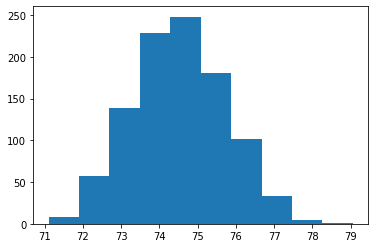

In [39]:
#Central limit theorem
from numpy.random import seed
from numpy.random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

seed(2)
means = [np.mean(randint(60,90,50)) for i in range(1000)]
plt.hist(means)
print('The mean of the sample means is {}'.format(np.mean(means)))

In [40]:
#Normality test for CLT
#Shapiro-Wilk
from scipy.stats import shapiro
stats, p = shapiro(means)
print('Statistics={}, p-value={}'.format(stats,p))
alpha =0.05
if(p > alpha):
    print("Fail to reject H0")
else:
    print("There is evidence that the data is not from a normally distributed population")

Statistics=0.997937798500061, p-value=0.25756120681762695
Fail to reject H0


In [27]:
#1 sample t-test
from scipy import stats
m = np.mean(means)
print("Mean", m)
tset, p = stats.ttest_1samp(means, 74)
print(tset, p)

Mean 74.52011999999999
13.663418569662646 4.322482647170606e-39


In [ ]:
#stats.ttest_rel() -> parired sample t-test
#stats.ttest_ind() -> independent sampled t-test

In [29]:
from statsmodels.stats import weightstats as stests
#stests.ztest(x1, x2=None, value=156) -> 1 sampled z-test
#stests.ztest(x1, x2, value=0, alternative='two-sided') -> independent sample z-test

In [41]:
#chi square test for feature independence
from sklearn.feature_selection import chi2

chi_scores  = chi2(X, y)
chi_table = pd.DataFrame(x_train.columns)
chi_table['Chi Score'] = chi_scores[0]
chi_table['p-value'] = chi_scores[1]
print(chi_table)
p_values = pd.Series(chi_scores[1], index = x_train.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

NameError: name 'x_train' is not defined

In [42]:
#chi square test for goodness of fit
from scipy.stats import chisquare

In [ ]:
#Anova

In [40]:
#Confidence interval
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
data = [1, 2, 3, 4, 5]

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h
print(start)
end = m + h
print(end)

1.036756838522439
4.9632431614775605


c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


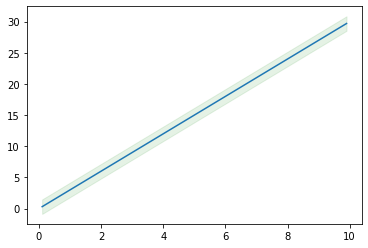

In [1]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
x= np.linspace(0.1, 9.9, 20)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.mean(y)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='g', alpha=.1)